In [ ]:
from urllib.request import urlretrieve
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7ecdabf71900>)

In [ ]:
medical_df = pd.read_csv('medical.csv')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
fd = medical_df[medical_df['age']<=51]
fd

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1331,23,female,33.400,0,no,southwest,10795.93733
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


Lets visualize the relation of charges colm with other coloums because the charges column we are goinng to predict

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(
    medical_df,
    x='age',
    marginal='box',
    nbins=47,
    title='Distribution of age'
)
fig.update_layout(bargap=0.1)
fig.show()


why 18 and 19 age pple are twise maybe there are some offers are offer by the company

In [ ]:
fg = px.histogram(
    medical_df,
    x='bmi',
    marginal='box',
    title='Distribution of bmi',
    color_discrete_sequence=['red']
)
fg.update_layout(bargap=0.1)
fg.show()

In [ ]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='smoker',
    title='Distribution of charges',
    color_discrete_sequence=['green','grey']
)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='sex',
    title='Distribution of charges',
    color_discrete_sequence=['green','grey']
)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='region',
    title='Distribution of charges',
    color_discrete_sequence=['green','grey']
)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

In [ ]:
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    opacity=0.8,
    hover_data=['sex'],
    color='smoker',
    title='Age vs Charges'
)
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(
    medical_df,
    x='bmi',
    y='charges',
    color='smoker',
    title='BMI vs Charges',
    hover_data=['sex'],
    opacity=0.8
)
fig.update_traces(marker_size=5)
fig.show()


In [ ]:
px.violin(medical_df,y='charges',x='children')

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
m = {'no':0,'yes':1}
numeric_smoker = medical_df.smoker.map(m)
medical_df.charges.corr(numeric_smoker)

0.787251430498478

In [ ]:
non_smoker = medical_df[medical_df.smoker=='no']
non_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'ages vs charges'}, xlabel='age', ylabel='charges'>

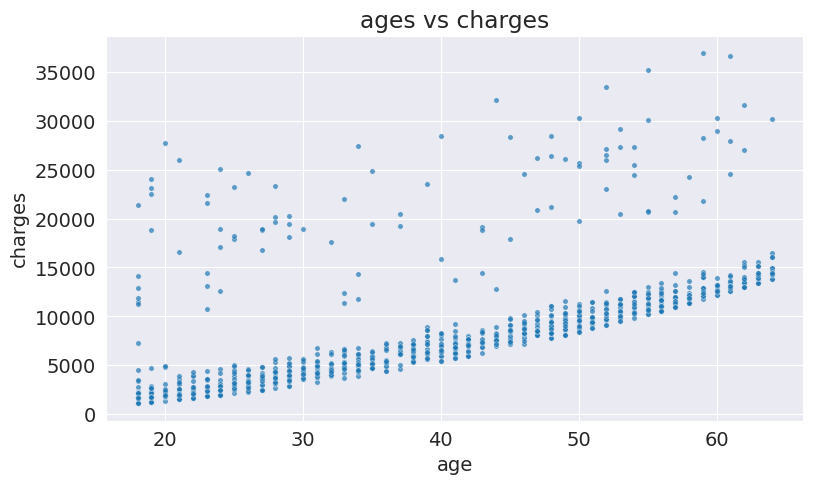

In [ ]:
plt.title('ages vs charges')
sns.scatterplot(data=non_smoker,x='age',y='charges',alpha=0.7,s=15)

In [ ]:
def estimate_charges(age,w,c):
  return w*age+c


In [ ]:
w=50
c=100


Text(0, 0.5, 'charges')

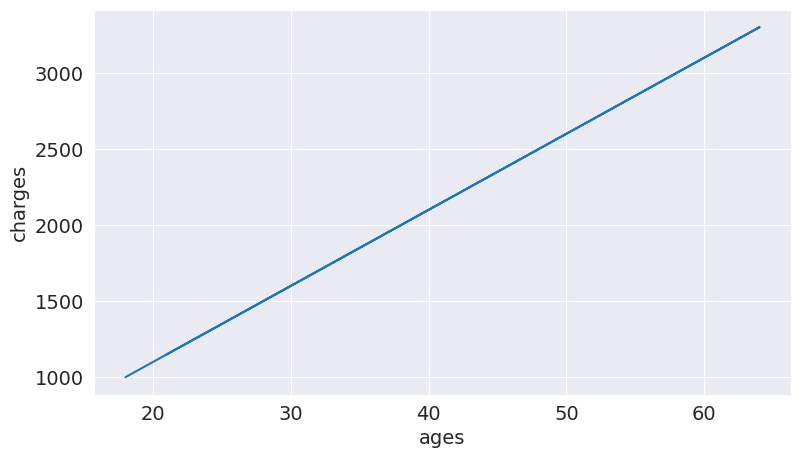

In [ ]:
ages = non_smoker.age
estimated_c = estimate_charges(ages,w,c)
plt.plot(ages,estimated_c)
plt.xlabel('ages')
plt.ylabel('charges')


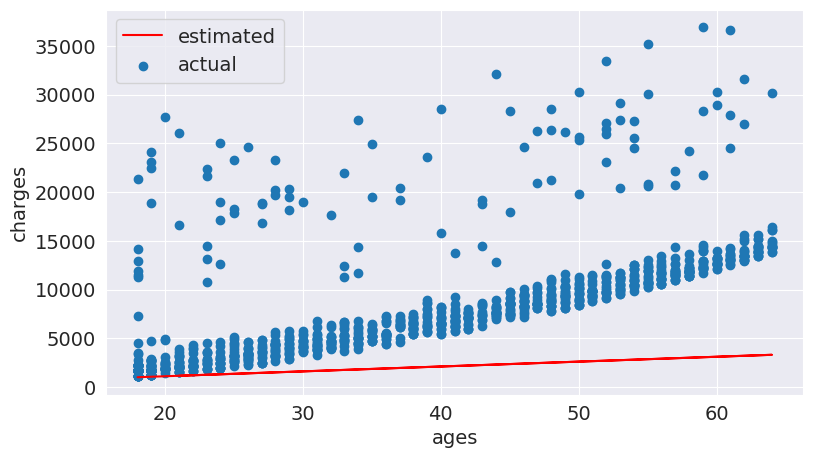

In [ ]:
plt.plot(ages,estimated_c ,color='red')
plt.scatter(non_smoker.age,non_smoker.charges)
plt.xlabel('ages')
plt.ylabel('charges')
plt.legend(['estimated','actual'])


In [ ]:
def try_para(w,c):
  ages = non_smoker.age
  estimated_c = estimate_charges(ages,w,c)
  plt.plot(ages,estimated_c,'r')
  plt.scatter(ages,non_smoker.charges)
  plt.show()

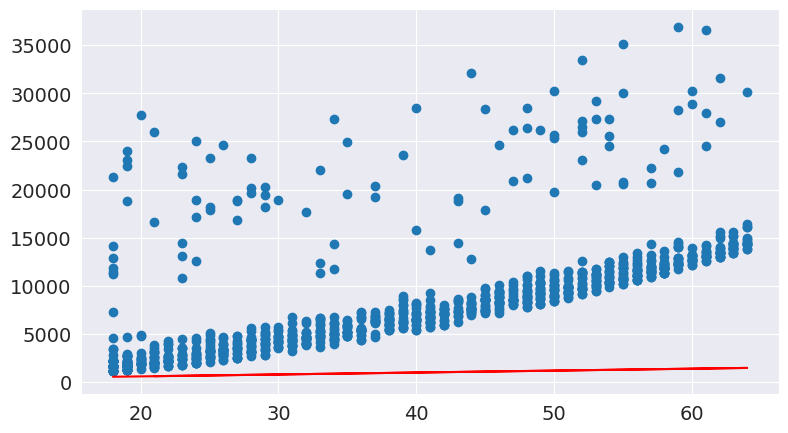

In [ ]:
try_para(20,200)

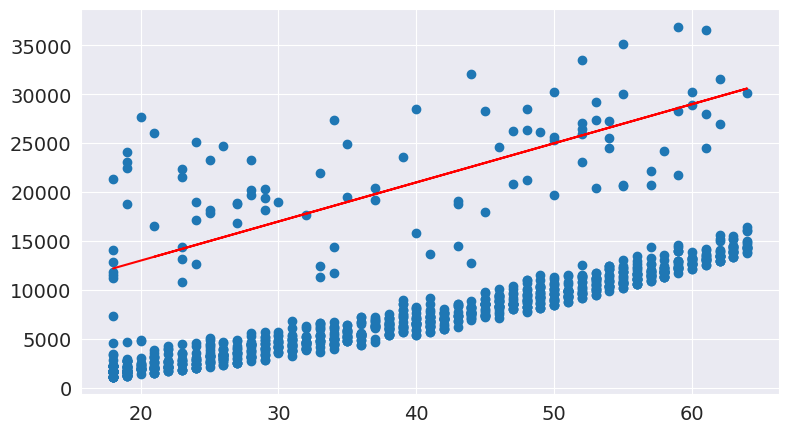

In [ ]:
try_para(400,5000)

In [ ]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
target = non_smoker.charges
ages = non_smoker.age
predicated = estimate_charges(ages,50,100)

rmse(target,predicated)

8461.949562575493

In [ ]:
def try_parap(w,c):
  target = non_smoker.charges
  predictions = estimate_charges(non_smoker.age,w,c)
  plt.plot(non_smoker.age,predictions,'r')
  plt.scatter(non_smoker.age,target)
  # print(predictions)
  # print(target)
  loss = rmse(target,predictions)
  print('rmse loss' , loss)


rmse loss 4784.595754855185


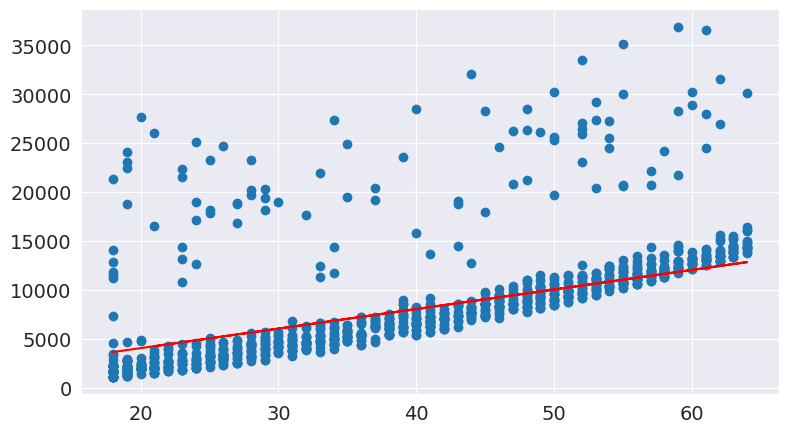

In [ ]:
try_parap(200,50)

need to find best values for w and c for that we need to use the optimizer

*   ordinary least square
*   stocastic gradiant decent



In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()


In [ ]:
inputs= non_smoker[['age']]
targets= non_smoker.charges
print('inpute shapes' , inputs.shape)
print('target shapes', targets.shape)

inpute shapes (1064, 1)
target shapes (1064,)


model takes input as data frame that should be 2d
but the inpute needs to be 1d

In [ ]:
model.fit(inputs,targets)


LinearRegression()

In [ ]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(targets,predictions)

4662.505766636395

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

rmse loss 4662.516524487403


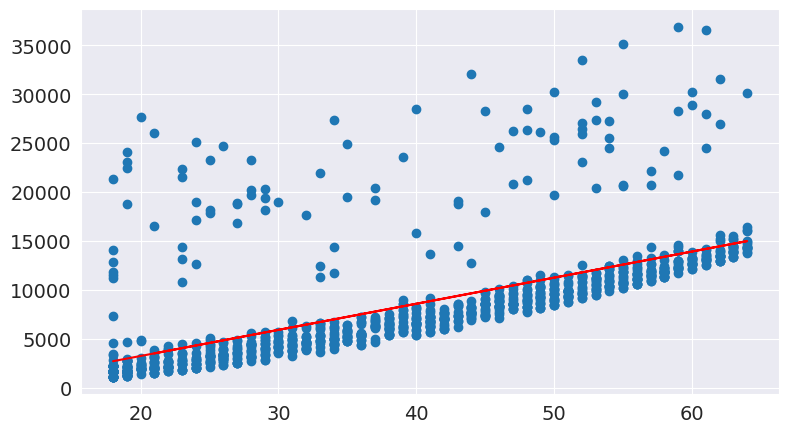

In [ ]:
try_parap(267,-2091)

In [ ]:
smoker = medical_df[medical_df['smoker']=='yes']
smoker

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [ ]:
inputes = non_smoker[['age','bmi']]
output = non_smoker.charges
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(inputes,output)

predictions= model.predict(inputes)
rmse(output,predictions)

4662.3128354612945

In [ ]:
non_smoker.charges.corr(non_smoker.bmi)

0.0840365431283327

<Axes: xlabel='bmi', ylabel='charges'>

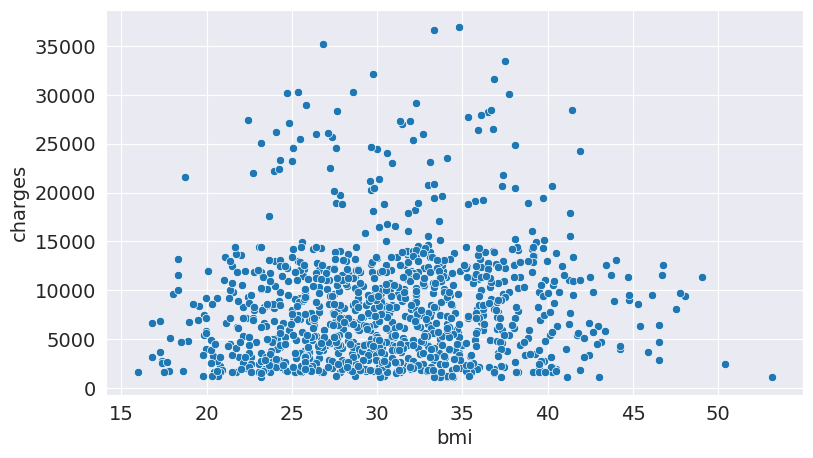

In [ ]:
sns.scatterplot(x=non_smoker.bmi,y=non_smoker.charges)

In [ ]:
model.coef_,model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

prediction usign only bmi


In [ ]:
input = non_smoker[['bmi']]
target = non_smoker.charges
model = LinearRegression().fit(input,target)
pre = model.predict(input)
rmse(pre,non_smoker.charges)

5969.772531913293

In [ ]:
inputes = non_smoker[['age','children','bmi']]
target = non_smoker.charges
model = LinearRegression().fit(inputes,target)
pre = model.predict(inputes)
rmse(pre,target)

4608.470405038247

<Axes: xlabel='smoker', ylabel='charges'>

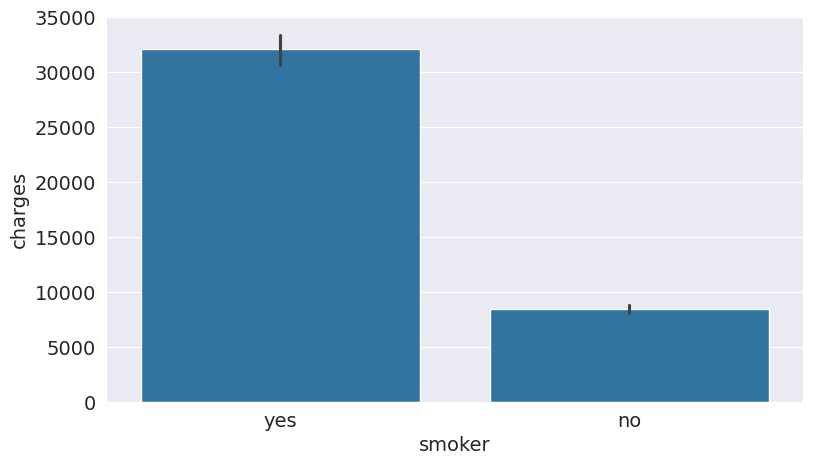

In [ ]:
sns.barplot(medical_df,x='smoker',y='charges')

In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
medical_df['smoker_code'] = medical_df.smoker.map({'yes':1,'no':0})
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
input,target = medical_df[['age','bmi','smoker_code','children']],medical_df.charges
model = LinearRegression().fit(input,target)
predication = model.predict(input)
rmse(predication,target)

6056.439217188082

In [ ]:
sex_code = {'female':0,'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_code)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
medical_df.sex_code.corr(medical_df.charges)

0.05729206220202548

In [ ]:
from sklearn.metrics import mean_squared_error as mse
input,target = medical_df[['age','bmi','smoker_code','children','sex_code']],medical_df.charges
model = LinearRegression().fit(input,target)
predication = model.predict(input)
rmse(predication,target)
# mse(predication,target,squared=False)

6056.100708754546

<Axes: xlabel='region', ylabel='charges'>

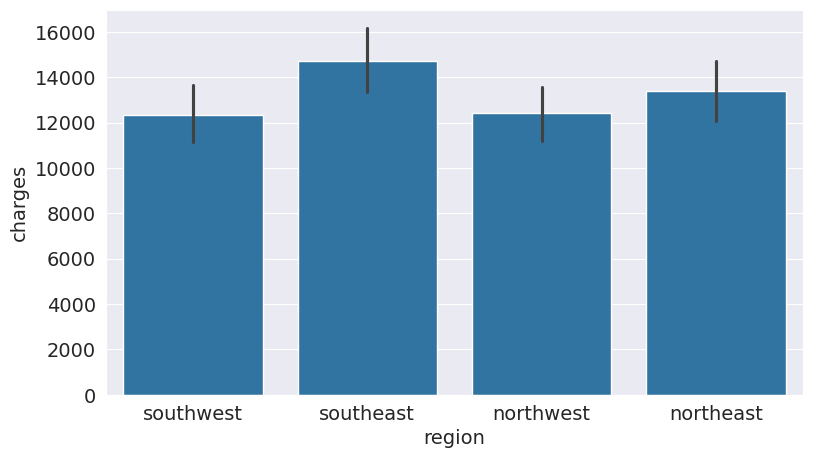

In [ ]:
sns.barplot(data=medical_df,x='region',y='charges')

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_


[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
OneHot = enc.transform(medical_df[['region']]).toarray()
medical_df[['northeast', 'northwest', 'southeast', 'southwest']]= OneHot

medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [ ]:
input,target = medical_df[['age','bmi','smoker_code','children','sex_code','northeast', 'northwest', 'southeast', 'southwest']],medical_df.charges
model = LinearRegression().fit(input,target)

predicted = model.predict(input)
mse(target,predicted,squared=False)

6041.679651174452

In [ ]:
px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,)

Creating 2 different model so we can minizie the error
thats workign because bmi have diff impact on smoker and different impact on non smoker

In [ ]:
non_smoker = medical_df[medical_df['smoker']=='no']
input,target = non_smoker[['age','bmi','smoker_code','children','sex_code','northeast', 'northwest', 'southeast', 'southwest']],non_smoker.charges
model = LinearRegression().fit(input,target)
predicted = model.predict(input)
print(mse(target,predicted,squared=False))

4573.074988795492


In [ ]:
smoker = medical_df[medical_df['smoker']=='yes']
# smoker.head()
input,target = smoker[['age','bmi','smoker_code','children','sex_code','northeast', 'northwest', 'southeast', 'southwest']],smoker.charges
model = LinearRegression().fit(input,target)
predicted = model.predict(input)
print(mse(target,predicted,squared=False))

5668.4678821121515


In [ ]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
input,target = medical_df[['age','bmi','smoker_code','children','sex_code','northeast', 'northwest', 'southeast', 'southwest']],medical_df.charges
model = LinearRegression().fit(input,target)

predicted = model.predict(input)
mse(target,predicted,squared=False)

6041.679651174452

In [ ]:
input_cols  = ['age','bmi','smoker_code','children','sex_code','northeast', 'northwest', 'southeast', 'southwest']

In [ ]:
weigh_df = pd.DataFrame({
    'feature':np.append(input_cols,1),
    'weights':np.append(model.coef_,model.intercept_)
})
weigh_df

,feature,weights
0,age,256.856353
1,bmi,339.193454
2,smoker_code,23848.534542
3,children,475.500545
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


**Standardization of numerical columns**

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age','bmi','children']
scaler = StandardScaler().fit(medical_df[numeric_cols])
scaler.mean_
scaled_input = scaler.transform(medical_df[numeric_cols])
scaled_input

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']
cat_d = medical_df[cat_cols].values

In [ ]:
input = np.concatenate((scaled_input,cat_d),axis=1)
target= medical_df.charges
model = LinearRegression().fit(input,target)
predicted = model.predict(input)
mse(target,predicted,squared=False)

6041.6796511744515

In [ ]:
weight_df = pd.DataFrame({
    'feature':np.append(numeric_cols,cat_cols),
    'weights':model.coef_
})
weight_df.sort_values('weights',ascending=False)


8466.48321541183

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=0.1)

(1204,)

In [ ]:
model= LinearRegression().fit(input_train,target_train)
prediction  = model.predict(input_test)
mse(target_test,prediction,squared=False)


5741.749414302381

In [ ]:
#testing on train data
precdition = model.predict(input_train)
mse(precdition,target_train,squared=False)

6078.0080473358885